In [184]:
# Imports
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from bs4 import BeautifulSoup 
import mplcyberpunk
#from tabulate import tabulate

In [185]:
#extract the data from the website
url = requests.get("https://www.fundsexplorer.com.br/ranking")

In [186]:
fii_bs4 = BeautifulSoup(url.text, "html.parser")

In [187]:
#find the table with a tag
fii_table = fii_bs4.findAll(attrs = {'id' : 'scroll-wrapper'})
table = fii_table[0].findAll('table')

In [188]:
fii_df = pd.read_html(str(fii_table[0]))[0]

In [189]:
#initial dataframe
fii_df

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 3,36",11271.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 72.396.365,96","R$ 7,69",44.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 16,51",1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 448.456.317,82","R$ 10,80",153.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 8,82",2223.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.688.895,17","R$ 13,26",67.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 925,00",2.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 224.603.756,71","R$ 2.020,24",46.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 12,72",856.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -12.176.856,00","R$ -16,06",-79.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,ALZR11,Logística,"R$ 110,87",6486.0,"R$ 0,81","0,73%","2,07%","8,25%","12,31%","0,69%",...,"R$ 740.337.456,78","R$ 106,94",104.0,"0,68%","-0,03%","0,65%","7,26%","0,00%",NaN,15
310,BPML11,Shoppings,"R$ 58,92",614.0,"R$ 0,27","0,46%","1,37%","2,49%","5,26%","0,46%",...,"R$ 537.073.355,75","R$ 124,75",47.0,NaN,NaN,NaN,NaN,"5,80%",NaN,7
311,FCFL11,Outros,"R$ 112,30",878.0,"R$ 0,80","0,72%","2,09%","4,10%","8,46%","0,70%",...,"R$ 403.561.990,48","R$ 116,17",97.0,NaN,NaN,NaN,NaN,"0,00%",NaN,1
312,NCRA11,NaN,"R$ 92,79",3200.0,"R$ 1,30","1,40%","5,48%","5,48%","0,00%","1,83%",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [190]:
fii_df.columns.values

array(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado',
       'DY (6M)Acumulado', 'DY (12M)Acumulado', 'DY (3M)Média',
       'DY (6M)Média', 'DY (12M)Média', 'DY Ano', 'Variação Preço',
       'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA',
       'P/VPA', 'DYPatrimonial', 'VariaçãoPatrimonial',
       'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada',
       'VacânciaFísica', 'VacânciaFinanceira', 'QuantidadeAtivos'],
      dtype=object)

In [191]:
#rename the columns
fii_df.columns = ['ticker', 'Setor', 'price', 'liquidez',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado',
       'DY (6M)Acumulado', 'dy', 'DY (3M)Média',
       'DY (6M)Média', 'Dividenmediio', 'DY Ano', 'Variação Preço',
       'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA',
       'pvpa', 'DYPatrimonial', 'VariaçãoPatrimonial',
       'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada',
       'VacânciaFísica', 'VacânciaFinanceira', 'QuantidadeAtivos']

In [192]:
fii_df.columns.values

array(['ticker', 'Setor', 'price', 'liquidez', 'Dividendo',
       'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado', 'dy',
       'DY (3M)Média', 'DY (6M)Média', 'Dividenmediio', 'DY Ano',
       'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'pvpa', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'], dtype=object)

In [193]:
#save a backup od the data
fii_back = fii_df.copy()

In [194]:
#select the columns needed for the test
test = fii_df[['ticker', 'price', 'dy', 'pvpa','liquidez']]

In [195]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker       0
price        7
dy           5
pvpa        18
liquidez     7
dtype: int64

In [196]:
#excludes the "nan" data
test = test[test['price'].notna()]
test = test[test['dy'].notna()]

In [197]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker       0
price        0
dy           0
pvpa        11
liquidez     0
dtype: int64

In [198]:
#classified the dataframe by dividend yeld from largest to smallest 
test = test.sort_values(['dy'], ascending=False)

In [199]:
test

,ticker,price,dy,pvpa,liquidez
221,HGLG11,"R$ 159,90","9,98%",104.0,23969.0
63,BCFF11,"R$ 62,95","9,96%",83.0,37539.0
124,PLRI11,"R$ 23,11","9,95%",72.0,132.0
168,BICR11,"R$ 91,50","9,83%",92.0,1.0
313,XPIN11,"R$ 70,66","9,80%",68.0,6161.0
...,...,...,...,...,...
277,CPTR11,"R$ 98,04","0,00%",99.0,15722.0
185,KEVE11,"R$ 965,11","0,00%",104.0,3.0
244,KCRE11,"R$ 91,40","0,00%",94.0,7635.0
82,RSPD11,"R$ 10,02","0,00%",1.0,103.0


In [200]:
# excludes the "R$" unit from the data
unit = 'R$'
test['price'] = [sub.replace(unit, "").strip() for sub in test['price']]

In [201]:
test

,ticker,price,dy,pvpa,liquidez
221,HGLG11,"159,90","9,98%",104.0,23969.0
63,BCFF11,"62,95","9,96%",83.0,37539.0
124,PLRI11,"23,11","9,95%",72.0,132.0
168,BICR11,"91,50","9,83%",92.0,1.0
313,XPIN11,"70,66","9,80%",68.0,6161.0
...,...,...,...,...,...
277,CPTR11,"98,04","0,00%",99.0,15722.0
185,KEVE11,"965,11","0,00%",104.0,3.0
244,KCRE11,"91,40","0,00%",94.0,7635.0
82,RSPD11,"10,02","0,00%",1.0,103.0


In [202]:
#view the types of the columns
test.dtypes

ticker       object
price        object
dy           object
pvpa        float64
liquidez    float64
dtype: object

In [203]:
#change the separator digit of "," for "."
test['price'] = test['price'].str.replace(',', '.')
test['price'] = pd.to_numeric(test['price'], errors='coerce')
test

,ticker,price,dy,pvpa,liquidez
221,HGLG11,159.90,"9,98%",104.0,23969.0
63,BCFF11,62.95,"9,96%",83.0,37539.0
124,PLRI11,23.11,"9,95%",72.0,132.0
168,BICR11,91.50,"9,83%",92.0,1.0
313,XPIN11,70.66,"9,80%",68.0,6161.0
...,...,...,...,...,...
277,CPTR11,98.04,"0,00%",99.0,15722.0
185,KEVE11,965.11,"0,00%",104.0,3.0
244,KCRE11,91.40,"0,00%",94.0,7635.0
82,RSPD11,10.02,"0,00%",1.0,103.0


In [204]:
#excludes the "nan" data
test = test[test['price'].notna()]

In [205]:
#calculate the daily liquidity
test['lid2'] = test['price'] * test['liquidez']
test

C:\Users\AGE9\AppData\Local\Temp\ipykernel_14896\603845583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lid2'] = test['price'] * test['liquidez']


,ticker,price,dy,pvpa,liquidez,lid2
221,HGLG11,159.90,"9,98%",104.0,23969.0,3832643.10
63,BCFF11,62.95,"9,96%",83.0,37539.0,2363080.05
124,PLRI11,23.11,"9,95%",72.0,132.0,3050.52
168,BICR11,91.50,"9,83%",92.0,1.0,91.50
313,XPIN11,70.66,"9,80%",68.0,6161.0,435336.26
...,...,...,...,...,...,...
277,CPTR11,98.04,"0,00%",99.0,15722.0,1541384.88
185,KEVE11,965.11,"0,00%",104.0,3.0,2895.33
244,KCRE11,91.40,"0,00%",94.0,7635.0,697839.00
82,RSPD11,10.02,"0,00%",1.0,103.0,1032.06


In [206]:
##classified the dataframe by daily liquidity from largest to smallest 
test = test.sort_values(['lid2'], ascending=False)

In [207]:
#reset the index
test.reset_index(inplace=True, drop=True)

In [208]:
#excludes the reits (fii) with daily liquidity less than R$ 200,000.00
indexNames = test[ (test['lid2'] <= 200000)].index
test.drop(indexNames , inplace=True)
test

,ticker,price,dy,pvpa,liquidez,lid2
0,STRX11,22.96,"0,00%",15.0,3180000.0,73012800.00
1,HOSI11,70.00,"9,51%",76.0,251164.0,17581480.00
2,HCTR11,86.69,"14,35%",72.0,183025.0,15866437.25
3,KNCR11,98.70,"13,42%",98.0,92089.0,9089184.30
4,KNIP11,89.01,"12,25%",95.0,72619.0,6463817.19
...,...,...,...,...,...,...
130,SADI11,89.54,"13,61%",91.0,2526.0,226178.04
131,VVPR11,101.50,"9,73%",104.0,2211.0,224416.50
132,VTLT11,87.90,"10,71%",87.0,2402.0,211135.80
133,RSPD11,10.02,"0,00%",1.0,20507.0,205480.14


In [209]:
#save the number of lines
ts = test.shape
ts = ts[0]

In [210]:
#classified the dataframe by dividend yeld from largest to smallest
test = test.sort_values(['dy'], ascending=False)
test.reset_index(inplace=True, drop=True)

In [211]:
b1 = [*range(0, ts, 1)]

In [212]:
#creates a ranking from highest to lowest dividend
test['b1'] = pd.Series(b1)

In [213]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1
0,HGLG11,159.90,"9,98%",104.0,23969.0,3832643.10,0
1,BCFF11,62.95,"9,96%",83.0,37539.0,2363080.05,1
2,XPIN11,70.66,"9,80%",68.0,6161.0,435336.26,2
3,HGRU11,115.63,"9,73%",94.0,26200.0,3029506.00,3
4,VVPR11,101.50,"9,73%",104.0,2211.0,224416.50,4
...,...,...,...,...,...,...,...
130,RSPD11,10.03,"0,00%",1.0,31960.0,320558.80,130
131,RURA11,10.29,"0,00%",NaN,63729.0,655771.41,131
132,VCRA11,105.53,"0,00%",103.0,12799.0,1350678.47,132
133,SNAG11,100.50,"0,00%",100.0,12389.0,1245094.50,133


In [214]:
#classified the dataframe by pvpa from largest to smallest
test = test.sort_values(['pvpa'], ascending=True)

In [215]:
test.reset_index(inplace=True, drop=True)

In [216]:
#creates a ranking from highest to lowest pvpa
b2 = [*range(0, ts, 1)]
test['b2'] = pd.Series(b2)

In [217]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1,b2
0,RSPD11,10.02,"0,00%",1.0,20507.0,205480.14,117,0
1,RSPD11,10.02,"0,00%",1.0,22773.0,228185.46,119,1
2,RSPD11,10.03,"0,00%",1.0,31960.0,320558.80,130,2
3,RSPD11,10.05,"0,00%",1.0,31636.0,317941.80,129,3
4,RSPD11,10.03,"0,00%",1.0,45627.0,457638.81,121,4
...,...,...,...,...,...,...,...,...
130,CORM11,99.42,"11,38%",112.0,20270.0,2015243.40,94,130
131,NCRA11,92.79,"0,00%",NaN,3200.0,296928.00,125,131
132,FGAA11,9.88,"0,00%",NaN,102418.0,1011889.84,127,132
133,AAZQ11,9.78,"0,00%",NaN,109187.0,1067848.86,128,133


In [218]:
#sum the dividend yeld rank with the pvpa rank
test = test.eval('Rank = b1 + b2')

In [219]:
#classified the dataframe by final rank from smallest to largest
test = test.sort_values(['Rank'], ascending=True)

In [220]:
test.reset_index(inplace=True, drop=True)

In [221]:
#select the top 10 reits (fii) to invest
indexNames = test[(test.index > 9)].index
test.drop(indexNames , inplace=True)
test

,ticker,price,dy,pvpa,liquidez,lid2,b1,b2,Rank
0,XPPR11,31.40,"9,39%",42.0,13518.0,424465.20,7,10,17
1,BRCR11,54.26,"9,07%",54.0,17926.0,972664.76,10,12,22
2,XPIN11,70.66,"9,80%",68.0,6161.0,435336.26,2,21,23
3,PATL11,63.06,"9,22%",64.0,7696.0,485309.76,8,19,27
4,FIGS11,45.80,"8,85%",60.0,4960.0,227168.00,14,17,31
5,RBRL11,73.60,"9,07%",69.0,6643.0,488924.80,11,22,33
6,RBRP11,44.83,"8,16%",57.0,16652.0,746509.16,22,15,37
7,JSRE11,62.36,"7,72%",55.0,26326.0,1641689.36,25,13,38
8,HSLG11,77.16,"9,10%",74.0,9516.0,734254.56,9,31,40
9,RCRB11,113.50,"6,51%",54.0,7421.0,842283.50,29,11,40


Text(0.5, 1.0, 'REITS RANK')

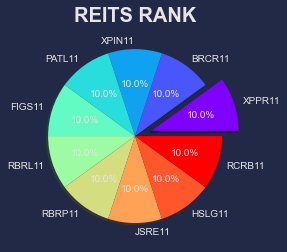

In [222]:
y = [10,10,10,10,10,10,10,10,10,10]
ml = test['ticker']
me = [0.2,0,0,0,0,0,0,0,0,0]
colors = plt.cm.rainbow(np.linspace(0, 1, len(y)))
plt.style.use("cyberpunk")
plt.pie(y, labels = ml, shadow=True, autopct='%1.1f%%', explode=me, colors=colors)
plt.title('REITS RANK',fontname="Arial",fontweight="bold", size=20)
#plt.legend()

In [223]:
tts = test['ticker']+".SA"
print(tts)

0    XPPR11.SA
1    BRCR11.SA
2    XPIN11.SA
3    PATL11.SA
4    FIGS11.SA
5    RBRL11.SA
6    RBRP11.SA
7    JSRE11.SA
8    HSLG11.SA
9    RCRB11.SA
Name: ticker, dtype: object


In [224]:
x = np.random.rand(10,1)
#x = x.T
x = pd.DataFrame(x, columns=[f'name{0}'])


for i in range (0,10):
    y = np.random.rand(10,1)
    #y = y.T
    y = pd.DataFrame(y, columns=[f'name{i+1}'])
    x = pd.concat([x,y], axis=1, join='inner', ignore_index=False, copy=False)

x


,name0,name1,name2,name3,name4,name5,name6,name7,name8,name9,name10
0,0.424126,0.516695,0.335894,0.435882,0.327726,0.684803,0.661351,0.728997,0.230046,0.918658,0.872571
1,0.607633,0.543745,0.524056,0.366003,0.261891,0.392760,0.912745,0.314310,0.598892,0.015323,0.427599
2,0.699352,0.818803,0.111935,0.150778,0.762399,0.526886,0.578549,0.977501,0.148888,0.321002,0.828524
3,0.834820,0.299104,0.407901,0.680526,0.333194,0.165094,0.707404,0.531838,0.989031,0.353613,0.919405
4,0.734492,0.096072,0.482234,0.143652,0.454227,0.102167,0.552843,0.461798,0.347974,0.587934,0.326764
5,0.936223,0.639508,0.107271,0.281134,0.389516,0.199820,0.809619,0.611394,0.812375,0.528325,0.840999
6,0.759005,0.989361,0.544722,0.505469,0.452199,0.334473,0.053883,0.798644,0.695866,0.550562,0.351673
7,0.792301,0.611894,0.239449,0.966263,0.714665,0.435548,0.898789,0.759770,0.762460,0.078962,0.407143
8,0.291201,0.411514,0.716857,0.529091,0.837337,0.751658,0.469154,0.199979,0.534531,0.661293,0.051655
9,0.407617,0.630157,0.057364,0.872818,0.268009,0.731444,0.245570,0.619460,0.454629,0.220057,0.573902


In [247]:
x = 0
data = yf.download(tts[x], period="1y")
dd = pd.DataFrame(data)
dd.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)
dd.rename(columns={'Adj Close': tts[x]}, inplace=True)

for x in range (10):
    data = yf.download(tts[x], period="1y")
    ddsad = pd.DataFrame(data)
    ddsad.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)
    ddsad.rename(columns={'Adj Close': tts[x]}, inplace=True)
    dd = pd.concat([dd, ddsad], axis=1, join='outer', ignore_index=False, copy=False)
dd
#dd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,XPPR11.SA,XPPR11.SA,BRCR11.SA,XPIN11.SA,PATL11.SA,FIGS11.SA,RBRL11.SA,RBRP11.SA,JSRE11.SA,HSLG11.SA,RCRB11.SA
Date,,,,,,,,,,,
2022-02-17,54.387699,54.387699,63.666340,76.255470,NaN,50.175797,76.468559,60.900723,70.423065,NaN,117.907898
2022-02-18,54.461178,54.461178,63.030052,76.663437,NaN,49.779404,78.022766,60.687294,70.973038,NaN,119.037086
2022-02-21,53.744713,53.744713,62.200108,75.793083,NaN,50.562969,78.464180,60.678017,71.317924,NaN,117.719688
2022-02-22,53.809010,53.809010,62.430649,75.502968,NaN,49.465973,78.160706,60.483147,71.522995,NaN,118.096092
2022-02-23,53.505882,53.505882,62.052567,75.457649,NaN,50.747337,77.461784,61.568840,71.243340,NaN,118.303123
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,30.790001,30.790001,54.169998,70.780182,NaN,45.570000,72.410004,45.880001,61.980000,NaN,113.720001
2023-02-14,30.930000,30.930000,54.320000,70.502731,NaN,45.750000,73.150002,45.560001,61.580002,NaN,113.699997
2023-02-15,31.090000,31.090000,54.099998,70.799995,NaN,46.000000,73.830002,45.500000,61.669998,NaN,113.500000


In [249]:
dd = dd.resample("M").last()
dd = dd.pct_change()
dd = dd.dropna(how='all')
dd.drop(['PATL11.SA','HSLG11.SA'], axis=1, inplace=True)
dd

,XPPR11.SA,XPPR11.SA,BRCR11.SA,XPIN11.SA,FIGS11.SA,RBRL11.SA,RBRP11.SA,JSRE11.SA,RCRB11.SA
Date,,,,,,,,,
2022-04-30,-1.644469,-1.644469,-3.043538,-0.732004,-4.058089,0.110554,-3.423959,-2.280853,-1.887368
2022-05-31,12.619126,12.619126,-1.547303,6.466605,-0.797637,-1.590822,-2.438170,-0.842795,4.023480
2022-06-30,-0.046536,-0.046536,2.638303,0.120172,5.143995,-0.578039,-0.184507,-2.819591,-2.199872
2022-07-31,0.082145,0.082145,-0.059398,-0.433565,-1.876053,-5.910084,0.520566,-1.686415,-1.137110
2022-08-31,-2.239037,-2.239037,-4.310194,-10.422312,3.030690,4.291384,-3.097638,10.509508,-32.720647
2022-09-30,-1.910115,-1.910115,-1.008000,-1.155192,-1.182529,-1.192958,-1.056402,-0.929174,-0.469798
2022-10-31,0.122758,0.122758,19.015883,-1.574023,-0.146121,-0.270151,2.912367,-2.187515,-1.678373
2022-11-30,0.462957,0.462957,1.972333,-6.087165,1.018537,3.234856,0.816925,11.160182,0.968928
2022-12-31,-0.249130,-0.249130,-1.211436,-1.011153,-1.085525,-1.150173,-0.878318,-1.097081,-1.032370


In [227]:
x = 0
data = yf.download(tts[x], period="1y")
dd = pd.DataFrame(data)
dd.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)
dd.rename(columns={'Adj Close': tts[x]}, inplace=True)

x = 1
data = yf.download(tts[x], period="1y")
ddsad = pd.DataFrame(data)
ddsad.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)
ddsad.rename(columns={'Adj Close': tts[x]}, inplace=True)
final = pd.concat([dd, ddsad], axis=1)
final


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,XPPR11.SA,BRCR11.SA
Date,,
2022-02-17,54.387695,63.666355
2022-02-18,54.461189,63.030056
2022-02-21,53.744713,62.200096
2022-02-22,53.809013,62.430649
2022-02-23,53.505890,62.052574
...,...,...
2023-02-13,30.790001,54.169998
2023-02-14,30.930000,54.320000
2023-02-15,31.090000,54.099998


Text(0.5, 1.0, 'DESEMPENHO')

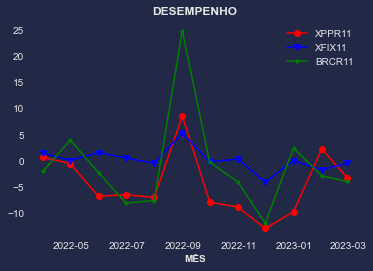

In [231]:
y = dd1['Adj Close']
y2 = dd['Adj Close']
y3 = dd2['Adj Close']
x = dd1.index
#fig, ax = plt.plot()
plt.style.use("cyberpunk")
plt.plot(x, y, color='red', label='XPPR11', marker='o')
plt.plot(x, y2, color='blue', label='XFIX11', marker='v')
plt.plot(x, y3, color='green', label='BRCR11', marker='.')
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.legend(loc='best')
#ax.set_label(y)
#ax.set_xticks(ind,labels=x)
#ax.bar_label(f, fmt='%.1f',padding=4, fontweight="bold")

plt.xlabel('MÊS', fontweight="bold")
plt.ylabel('VARIAÇÃO', fontweight="bold", visible=False)
plt.title('DESEMPENHO', fontweight="bold")